In [28]:
import numpy as np #lineer cebir kütüphanesi
import pandas as pd #veri okuma/ analiz kütüphanesi
import os  #işletim sistemi uyumu için
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt #grafik plot
import seaborn as sns #grafik plot

In [29]:
mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

In [30]:
data=pd.read_csv('dataall.csv',encoding="utf8")
kadin = pd.read_csv("/home/ebru/Desktop/NLP/NLP_project/kadin.csv")
erkek = pd.read_csv("/home/ebru/Desktop/NLP/NLP_project/erkek.csv")

In [31]:
data.head()

,Unnamed: 0,text,label
0,0,Boğaziçi Üniversitesi’nin zengin çocuklarının ...,female
1,1,Eksik\n\nİclal Aydın - iclal@gazetevatan.com\n...,female
2,2,Uçağa binmeden yazıyı yetiştireyim demiştim a...,female
3,3,"Somali’de çocukların öldüğü, insanların açlıkt...",female
4,4,Ben neden şimdi öğrendim anne?\n\nİclal Aydın ...,female


In [32]:
kadin.head()

,Unnamed: 0,text,label
0,0,Boğaziçi Üniversitesi’nin zengin çocuklarının ...,female
1,1,Eksik\n\nİclal Aydın - iclal@gazetevatan.com\n...,female
2,2,Uçağa binmeden yazıyı yetiştireyim demiştim a...,female
3,3,"Somali’de çocukların öldüğü, insanların açlıkt...",female
4,4,Ben neden şimdi öğrendim anne?\n\nİclal Aydın ...,female


In [33]:
import nltk #doğal dil işleme kütüphanesi
nltk.download('stopwords')  #stopwords yükleme

[nltk_data] Downloading package stopwords to /home/ebru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stopwords = set(STOPWORDS)

In [35]:
wordcloud1 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(kadin['text']))

In [36]:
wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(erkek['text']))

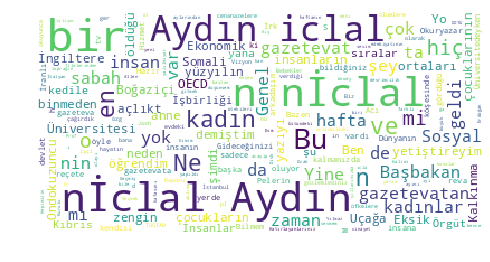

In [37]:
print(wordcloud1)
fig = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()
fig.savefig("wordkadin.png", dpi=900)

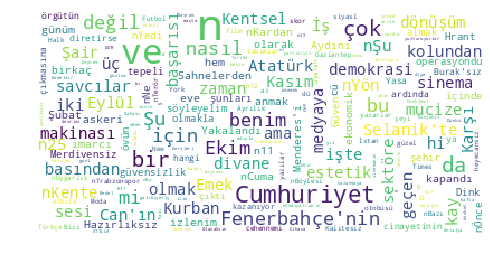

In [38]:
print(wordcloud2)
fig = plt.figure(1)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
fig.savefig("worderkek.png", dpi=900)

In [39]:
#işleme etkisi olmayan kelimeler kaldırılır
etkisiz_kelimeler = 'İclal Aydın - iclal@gazetevatan.com'
#stopwords kaldırma fonksiyonu
def etkisizleriKaldir(text):
    return " ".join([word for word in str(text).split() if word not in etkisiz_kelimeler])

In [40]:
kadin["text_i"] = kadin["text"].apply(lambda text : etkisizleriKaldir(text))
kadin.head()

,Unnamed: 0,text,label,text_i
0,0,Boğaziçi Üniversitesi’nin zengin çocuklarının ...,female,Boğaziçi Üniversitesi’nin zengin çocuklarının ...
1,1,Eksik\n\nİclal Aydın - iclal@gazetevatan.com\n...,female,Eksik Audrey Hepburn’ün hayatını okuyorum. Faş...
2,2,Uçağa binmeden yazıyı yetiştireyim demiştim a...,female,Uçağa binmeden yazıyı yetiştireyim demiştim am...
3,3,"Somali’de çocukların öldüğü, insanların açlıkt...",female,"Somali’de çocukların öldüğü, insanların açlıkt..."
4,4,Ben neden şimdi öğrendim anne?\n\nİclal Aydın ...,female,Ben neden şimdi öğrendim anne? Laliş (9) okuld...


In [41]:
wordcloud3 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(kadin['text_i']))

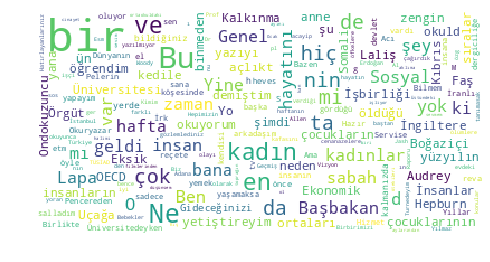

In [42]:
print(wordcloud3)
fig = plt.figure(1)
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()
fig.savefig("wordkadin_i.png", dpi=900)

In [43]:
data["text"] = data["text"].apply(lambda text : etkisizleriKaldir(text))
data.head()

,Unnamed: 0,text,label
0,0,Boğaziçi Üniversitesi’nin zengin çocuklarının ...,female
1,1,Eksik Audrey Hepburn’ün hayatını okuyorum. Faş...,female
2,2,Uçağa binmeden yazıyı yetiştireyim demiştim am...,female
3,3,"Somali’de çocukların öldüğü, insanların açlıkt...",female
4,4,Ben neden şimdi öğrendim anne? Laliş (9) okuld...,female


In [44]:
#csv yapıp tekrar okutmadan kaynaklanan gereksiz column u silme
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,text,label
0,Boğaziçi Üniversitesi’nin zengin çocuklarının ...,female
1,Eksik Audrey Hepburn’ün hayatını okuyorum. Faş...,female
2,Uçağa binmeden yazıyı yetiştireyim demiştim am...,female
3,"Somali’de çocukların öldüğü, insanların açlıkt...",female
4,Ben neden şimdi öğrendim anne? Laliş (9) okuld...,female


In [45]:
#tekrar eden verileri kontrol etme
print("Duplitace toplam sayısı:")
print(data.duplicated().sum())
#Null veri olup olmadığını kontrol etme
print("Null value toplam sayısı")
print(data.isnull().sum())

Duplitace toplam sayısı:
17
Null value toplam sayısı
text     0
label    0
dtype: int64


In [46]:
#tekrar eden verileri silme
data = data.drop_duplicates()
#index kontrolü
data

,text,label
0,Boğaziçi Üniversitesi’nin zengin çocuklarının ...,female
1,Eksik Audrey Hepburn’ün hayatını okuyorum. Faş...,female
2,Uçağa binmeden yazıyı yetiştireyim demiştim am...,female
3,"Somali’de çocukların öldüğü, insanların açlıkt...",female
4,Ben neden şimdi öğrendim anne? Laliş (9) okuld...,female
5,Ondokuzuncu yüzyılın ortaları. İngiltere’de Yo...,female
6,OECD’nin (Ekonomik Kalkınma ve İşbirliği Örgüt...,female
7,"İnsanlar bir yana, şu sıralar Kıbrıs’ta kedile...",female
8,Gideceğinizi bildiğiniz bir yerde kalmanızda h...,female
9,Üniversitedeyken İranlı bir arkadaşım vardı: M...,female


In [48]:
#analizde kullanılacak veriseti kaydedildi
data.to_csv("dataall2.csv")

In [49]:
#Data da  249 kadın, 234 erkek içerir (performansı etkilemesin diye duplicate sildiğimiz için azaldı)
data['label'].value_counts()

female    249
male      234
Name: label, dtype: int64

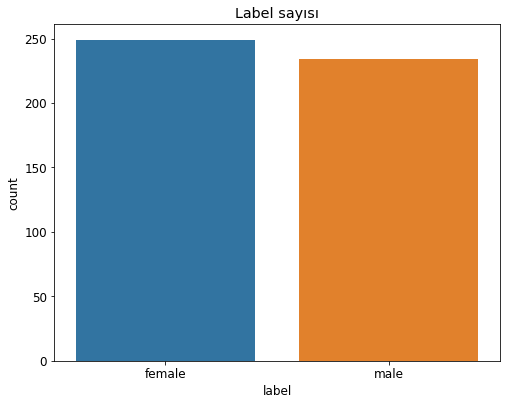

In [52]:
#Data label grafiği, hemen hemen eşit
sns.countplot(data.label)
plt.title('Label sayısı')
plt.show()